<a href="https://colab.research.google.com/github/rtrochepy/machine_learning/blob/main/calculo_tir_tae_diario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fórmula TIR Diario**

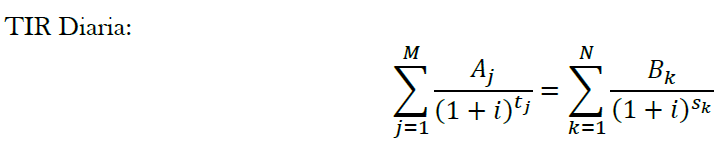

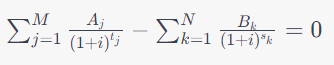

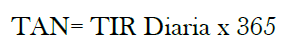

M = Número de veces que el cliente recibe fondos.

j = Número consecutivo que identifica cada ocasión en la que el cliente efectivamente recibe fondos.

Aj = Monto de la j-ésima ocasión en la que el cliente efectivamente recibe fondos.

tj = Intervalo de tiempo, expresado en días, que transcurre entre la fecha en que surte efecto el contrato y la fecha de la j-ésima ocasión en la que el
cliente efectivamente recibe fondos.

N = Número total de pagos.

k = Número consecutivo que identifica cada pago.

Bk = Monto del k-ésimo pago.

sk = Intervalo de tiempo, expresado en días, que transcurre entre la fecha en que surte efecto el contrato y la fecha del k-ésimo pago.

**Fórmula TAE**

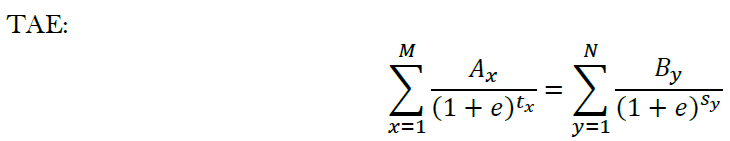

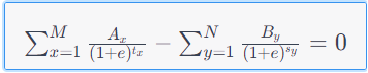

M = Número de veces que el cliente recibe fondos.

x = Número consecutivo que identifica cada ocasión en la que el cliente efectivamente recibe fondos.

Ax = Monto de la x-ésima ocasión en la que el cliente efectivamente recibe fondos.

tx = Intervalo de tiempo, expresado en años y fracciones de año, que transcurre entre la fecha en que surte efecto el contrato y la fecha de la x-ésima ocasión la que el cliente efectivamente recibe fondos.

N = Número total de pagos.

y = Número consecutivo que identifica cada pago.

By = Monto del y-ésimo pago.

sy = Intervalo de tiempo, expresado en años y fracciones de año, que transcurre entre la fecha en que surte efecto el contrato y la fecha del y-ésimo pago.

**Calculo del TAE a partir del TIR Diario**

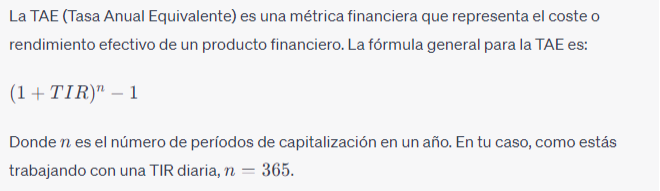

In [5]:
#def calculate_sum(i, values, periods):
#    return sum(val / (1 + i)**period for val, period in zip(values, periods))
def calculate_sum(i, values, periods):
    total = 0.0
    for val, period in zip(values, periods):
        factor = 1.0
        for _ in range(period):
            factor /= (1 + i)
        total += val * factor
    return total

In [6]:
def tir_diaria(flujos_iniciales, periodos_iniciales, flujos_finales, periodos_finales, tol=1e-6, max_iter=1000):
    lower = 0.0
    upper = 1.0

    for _ in range(max_iter):
        middle = (upper + lower) / 2
        sum_iniciales = calculate_sum(middle, flujos_iniciales, periodos_iniciales)
        sum_finales = calculate_sum(middle, flujos_finales, periodos_finales)
        diff = sum_iniciales - sum_finales

        if abs(diff) < tol or upper - lower < tol:
            return middle

        if diff < 0:
            lower = middle
        else:
            upper = middle

    raise ValueError("No se pudo encontrar una solución en las iteraciones dadas")

In [37]:
# Ejemplo de uso:

# Aquí, A, t, B y s son listas que representan las series de valores Aj, tj, Bk y sk respectivamente
A = [348500000]  # Ejemplo
t = [0]
B = [2662636, 2655486, 2659513, 2656082, 2660105, 4656687, 2658611, 2666342, 2659319, 2663324, 2659972, 2663974, 2660634, 2660938, 2664935, 2661615, 2665608, 4662303, 2664270, 2675541, 2665124, 2669096, 2665863, 2669831, 2666613, 2666962, 2670924, 2667730, 2671687, 4668508, 2670521, 2681592, 2671465, 2675402, 2672299, 2676231, 2673146, 2673544, 2677469, 2674408, 2678329, 4675287, 2677351, 2688203, 2678394, 2682291, 2679331, 2683223, 2680282, 2680734, 2684618, 2681706, 2685584, 4682693, 2684814, 2692050, 2685905, 2689760, 2686954, 2690803, 2688020, 2688529, 2692369, 2689617, 2693451, 4690722, 2692903, 2703255, 2694170, 2697978, 2695343, 2699144, 2696532, 2697106, 2700898, 2698322, 2702107, 4699556, 2701804, 2711870, 2703200, 2706956, 2704506, 2708256, 2705833, 2706477, 2710215, 2707833, 2711563, 4709209, 2711529, 2721283, 2713065, 2716765, 2714519, 2718212, 2715995, 2716715, 2720395, 2718223, 2721894, 4719754, 2722154, 2728685, 2723793, 2727433, 2725407, 2729037, 2727045, 2727848, 2731466, 2729523, 2733130, 4731221, 2733708, 2742751, 2735564, 2739137, 2737353, 2740916, 2739169, 2740064, 2743611, 2741920, 2745457, 4743804, 2746385, 2755021, 2748425, 2751924, 2750405, 2753894, 2752415, 2753410, 2756882, 2755465, 2758925, 4757551, 2760236, 2768427, 2762475, 2765894, 2764665, 2768072, 2766887, 2767991, 2771380, 2770263, 2773640, 4772569, 2775367, 2780894, 2777787, 2781120, 2780206, 2783524, 2782659, 2783882, 2787181, 2786392, 2789676, 4788937, 2791859, 2799035, 2794554, 2797792, 2797222, 2800446, 2799930, 2801283, 2804483, 2804052, 2807236, 4806860, 2809916, 2816514, 2812873, 2816007, 2815814, 2818932, 2818799, 2820294, 2823386, 2823346, 2826420, 4826443, 2829646, 2835610, 2832888, 2835908, 2836126, 2839129, 2839414, 2841064, 2844038, 2844425, 2847380, 4847836, 2851201, 2855296, 2854733, 2857630, 2858298, 2861174, 2861915, 2863736, 2866581, 2867434, 2870259, 4871187, 2874728, 2879246, 2878621, 2881383, 2882542, 2885280, 2886521, 2888526, 2891230, 2892594, 2895275, 4896723, 2900456, 2904147, 2904720, 2907332, 2909029, 2911618, 2913402, 2915610, 2918162, 2920081, 2922608, 4924619, 2928563, 2931352, 2933233, 2935684, 2937967, 2942486]
s = [29, 60, 90, 121, 151, 182, 213, 242, 273, 303, 334, 364, 395, 426, 456, 487, 517, 548, 579, 607, 638, 668, 699, 729, 760, 791, 821, 852, 882, 913, 944, 972, 1003, 1033, 1064, 1094, 1125, 1156, 1186, 1217, 1247, 1278, 1309, 1337, 1368, 1398, 1429, 1459, 1490, 1521, 1551, 1582, 1612, 1643, 1674, 1703, 1734, 1764, 1795, 1825, 1856, 1887, 1917, 1948, 1978, 2009, 2040, 2068, 2099, 2129, 2160, 2190, 2221, 2252, 2282, 2313, 2343, 2374, 2405, 2433, 2464, 2494, 2525, 2555, 2586, 2617, 2647, 2678, 2708, 2739, 2770, 2798, 2829, 2859, 2890, 2920, 2951, 2982, 3012, 3043, 3073, 3104, 3135, 3164, 3195, 3225, 3256, 3286, 3317, 3348, 3378, 3409, 3439, 3470, 3501, 3529, 3560, 3590, 3621, 3651, 3682, 3713, 3743, 3774, 3804, 3835, 3866, 3894, 3925, 3955, 3986, 4016, 4047, 4078, 4108, 4139, 4169, 4200, 4231, 4259, 4290, 4320, 4351, 4381, 4412, 4443, 4473, 4504, 4534, 4565, 4596, 4625, 4656, 4686, 4717, 4747, 4778, 4809, 4839, 4870, 4900, 4931, 4962, 4990, 5021, 5051, 5082, 5112, 5143, 5174, 5204, 5235, 5265, 5296, 5327, 5355, 5386, 5416, 5447, 5477, 5508, 5539, 5569, 5600, 5630, 5661, 5692, 5720, 5751, 5781, 5812, 5842, 5873, 5904, 5934, 5965, 5995, 6026, 6057, 6086, 6117, 6147, 6178, 6208, 6239, 6270, 6300, 6331, 6361, 6392, 6423, 6451, 6482, 6512, 6543, 6573, 6604, 6635, 6665, 6696, 6726, 6757, 6788, 6816, 6847, 6877, 6908, 6938, 6969, 7000, 7030, 7061, 7091, 7122, 7153, 7181, 7212, 7242, 7273, 7303]


In [38]:
i = tir_diaria(A, t, B, s)
TIR = i * 100
TAN = TIR * 365
TAE = ((1 + i)**365 - 1) * 100

print(f"TIR diaria: {TIR:.12f}%")
print(f"TAN: {TAN:.12f}%")
print(f"TAE: {TAE:.12f}%")

TIR diaria: 0.021600723267%
TAN: 7.884263992310%
TAE: 8.202482724509%
